# LeNet 5 using TF and Keras

### 1. Import required packages

In [48]:
from __future__ import print_function

import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.activations import relu
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar100, cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Packages Loaded")
print('The Tensorflow version is {}.'.format(tf.__version__))
print('The Keras version is {}.'.format(keras.__version__))
print('The Pandas version is {}.'.format(pd.__version__))
print('The Numpy version is {}.'.format(np.__version__))
print(np.__file__)

Packages Loaded
The Tensorflow version is 2.1.0.
The Keras version is 2.2.4-tf.
The Pandas version is 1.0.3.
The Numpy version is 1.18.1.
C:\ProgramData\Anaconda2\envs\TFK35\lib\site-packages\numpy\__init__.py


### 2. Pipe line the MNIST Dataset from keras

Text(0.5, 1.0, '4')

Text(0.5, 1.0, '4')

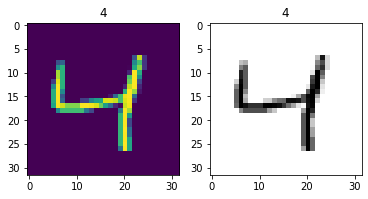

Shape of Minist train data (60000, 32, 32, 1).
Shape of Minist test data (10000, 32, 32, 1).


In [54]:
#Download the minist data from keras
mnist = tf.keras.datasets.mnist

#Split the data between train and test data
(x1_train, y1_train),(x1_test, y1_test) = mnist.load_data()

#Split the data between train and test data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#Normalize the data 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

#Zero pad mnist data from 28 to 32
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])

# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Display a sample image
fig = plt.figure()
ax1 = plt.subplot(1,2,1)
ax1.set_title(y1_train[2])
plt.imshow(x_train[2])

ax2 = plt.subplot(1,2,2)
ax2.set_title(y1_train[2])
plt.imshow(x_train[2], cmap = plt.cm.binary)
plt.show()

# Add a new axis, because we have gray scale images with one channel
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

#Print the shape of train and test data
print('Shape of Minist train data {}.'.format(x_train.shape))
print('Shape of Minist test data {}.'.format(x_test.shape))

### 3. Add CNN 32 maps with filter size 5

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 147us/sample - loss: 0.5030 - accuracy: 0.8551 - val_loss: 0.2319 - val_accuracy: 0.9328
Epoch 2/10
48000/48000 [==============================] - 8s 157us/sample - loss: 0.1926 - accuracy: 0.9426 - val_loss: 0.1473 - val_accuracy: 0.9566
Epoch 3/10
48000/48000 [==============================] - 7s 137us/sample - loss: 0.1274 - accuracy: 0.9618 - val_loss: 0.1120 - val_accuracy: 0.9672
Epoch 4/10
48000/48000 [==============================] - 8s 157us/sample - loss: 0.0924 - accuracy: 0.9718 - val_loss: 0.0902 - val_accuracy: 0.9736
Epoch 5/10
48000/48000 [==============================] - 7s 148us/sample - loss: 0.0733 - accuracy: 0.9781 - val_loss: 0.0777 - val_accuracy: 0.9761
Epoch 6/10
48000/48000 [==============================] - 7s 147us/sample - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.0748 - val_accuracy: 0.9770
Epoch 7/10
48000/48000 [==========================

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'CNN Cifar10 Residual Nets')

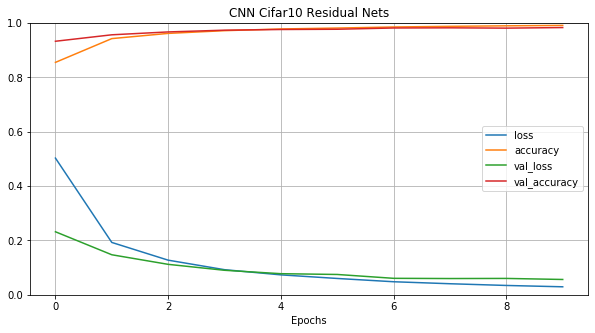

10000/10000 [==============================] - 1s 116us/sample - loss: 0.0500 - accuracy: 0.9845
Validation Accuracy: 0.9845
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_34 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_35 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_18 (Flatten)         (None, 120)               0    

In [50]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(6, [5, 5], strides=(1, 1), activation='tanh', input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(16, [5, 5], strides=(1, 1), activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(120, [5, 5], strides=(1, 1), activation='tanh'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

datetime = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join('logs','fit',datetime,'')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_detail = model.fit(x_train, y_train,
                  batch_size=256,
                  epochs=10,
                  callbacks=[early_stopping_cb, tensorboard_callback],
                  shuffle=True,
                  validation_split=0.2)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('CNN Cifar10 Residual Nets')
plt.show()

#After training the model, evaluate the test set
val_loss, val_acc = model.evaluate(x_test,y_test)
print("Validation Accuracy: "+str(val_acc))

#Print the summary of the model
model.summary()

In [51]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 12908), started 0:10:11 ago. (Use '!kill 12908' to kill it.)

IndexError: list index out of range

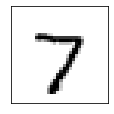

In [58]:
class_names = ['2', '4', '6', '8']

prediction_values = model.predict_classes(x_test)

# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 28x28 pixels
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(tf.reshape(x_test[i,:], [32, 32]),cmap=plt.cm.gray_r, interpolation='nearest')
  
    if prediction_values[i] == np.argmax(y_test[i]):
        # label the image with the blue text
        ax.text(0, 7, class_names[prediction_values[i]], color='blue')
    else:
        # label the image with the red text
        ax.text(0, 7, class_names[prediction_values[i]], color='red')